# Projeto Crimes em SP - Homicídios

## Hipóteses:

### Principais
    * Bairros com menor renda de sp tem um maior número de homicídios consumados. 

    * Homicídios ocorrem com maior frequência a noite e em locais abertos.

### Secundárias
    
    * Homicídios aumentaram ao longo do tempo em todas as zonas de São Paulo da mesma forma.

    * Homens entre 21 e 30 anos tem uma maior taxa de homicídios.

In [74]:
# Importando as bibliotecas necessárias
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Carregando o dataset que vai ser utilizado
homicidio_doloso = pd.read_csv(r"C:\Users\Lenovo\Downloads\Homicidio Doloso.csv\Homicidio Doloso Data SSP.csv", sep=";", encoding="latin-1", low_memory=False)

# Selecionando e Limpando os dados

In [75]:
# Vendo o tamanho e as informações do dataset
print(homicidio_doloso.shape)
homicidio_doloso.info()

(147033, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147033 entries, 0 to 147032
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ANO_BO                    147033 non-null  int64  
 1   NUM_BO                    147033 non-null  int64  
 2   NUMERO_BOLETIM            147033 non-null  object 
 3   BO_INICIADO               147033 non-null  object 
 4   BO_EMITIDO                147033 non-null  object 
 5   DATAOCORRENCIA            147033 non-null  object 
 6   HORAOCORRENCIA            137444 non-null  object 
 7   PERIDOOCORRENCIA          147033 non-null  object 
 8   DATACOMUNICACAO           147033 non-null  object 
 9   DATAELABORACAO            147033 non-null  object 
 10  BO_AUTORIA                147033 non-null  object 
 11  FLAGRANTE                 147033 non-null  object 
 12  NUMERO_BOLETIM_PRINCIPAL  26816 non-null   object 
 13  LOGRADOURO                11643

In [76]:
# Selecionando as colunas que eu desejo para fazer as análises
homicidio = homicidio_doloso[["ANO_BO", "NUM_BO", "HORAOCORRENCIA", "PERIDOOCORRENCIA", "BAIRRO", "CIDADE", "UF", "DESCRICAOLOCAL", "STATUS"]]
homicidio = homicidio.rename(columns={
    "ANO_BO": "ANO",
    "HORAOCORRENCIA": "HORA",
    "PERIDOOCORRENCIA": "PERIODO",
    "BAIRRO": "BAIRRO",
    "DESCRICAOLOCAL": "LOCAL",
    })
# Dataframes diferentes para sexo e idade já que possuem poucos dados neles
sexo = homicidio_doloso[["ANO_BO", "NUM_BO", "SEXO", "BAIRRO"]]

idade = homicidio_doloso[["ANO_BO", "NUM_BO", "IDADE", "BAIRRO"]]

In [77]:
# Verificando e apangando dados nulos (Nan)
print(homicidio.isna().sum())
print(sexo.isna().sum())
print(idade.isna().sum())
homicidio.dropna(inplace=True)
sexo.dropna(inplace=True)
idade.dropna(inplace=True)

ANO           0
NUM_BO        0
HORA       9589
PERIODO       0
BAIRRO     9109
CIDADE      453
UF          453
LOCAL         0
STATUS     3964
dtype: int64
ANO_BO        0
NUM_BO        0
SEXO      93228
BAIRRO     9109
dtype: int64
ANO_BO         0
NUM_BO         0
IDADE     101519
BAIRRO      9109
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16788\3779185214.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16788\3779185214.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
# Verificando e apagando dados duplicados
print(homicidio.duplicated().sum())
print(sexo.duplicated().sum())
print(idade.duplicated().sum())
homicidio.drop_duplicates(inplace=True)
sexo.drop_duplicates(inplace=True)
idade.drop_duplicates(inplace=True)

49832
21178
16215


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16788\3209223877.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16788\3209223877.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# Vendo resultado final dos dataframes
print(homicidio.shape)
print(sexo.shape)
print(idade.shape)
homicidio.head()

(75805, 9)
(30724, 4)
(27720, 4)


,ANO,NUM_BO,HORA,PERIODO,BAIRRO,CIDADE,UF,LOCAL,STATUS
0,2021,3652,11:43,PELA MANHÃ,BAIRRO DO RIBEIRO,LINS,SP,Residência,Consumado
2,2021,4134,23:30,A NOITE,Parque Brasil,S.PAULO,SP,Via pública,Consumado
3,2021,343,16:30,A TARDE,LIBERDADE,S.PAULO,SP,Via pública,Consumado
7,2021,4136,23:30,A NOITE,Parque Brasil,S.PAULO,SP,Via pública,Consumado
8,2021,4225,23:00,A NOITE,CUMBICA,GUARULHOS,SP,Via pública,Consumado


In [80]:
# Selecionando apenas os dados da UF de São Paulo e apagando os que não são
homicidio_UF = homicidio[homicidio["UF"] != "SP"]
print(homicidio_UF.shape)
homicidio = homicidio.drop(homicidio_UF.index)
homicidio.shape

(1, 9)


(75804, 9)

# Organizando os dados

In [81]:
#pd.set_option('display.max.rows', 3654)

In [82]:
# Funções para usar a seguir

# Função que seleciona os bairros de uma lista dentro de um dataframe e devolve eles agrupados por bairro e também por ano e bairro
def maiuscula(lista):
    # Torna a lista em máiusculo
    i = 0
    for bairro in lista:
        lista[i] = bairro.upper()
        i += 1
    # Verifica os dados do dataframe que estão na lista
    zona = cidade_sp[cidade_sp["BAIRRO"].isin(lista)]
    # Agrupa os dados por bairro e devolve quantas vezes apareceu(Número de homicídios) em ordem decrescente, apenas o top 10
    zona_hom = zona.groupby("BAIRRO").count().sort_values(by="ANO", ascending=False).reset_index().iloc[0:5]
    # Agrupa por ano e depois por bairro e devolve o número de homicídios em ordem decrescente
    zona = zona.groupby(["ANO", "BAIRRO"]).count().sort_values(by=["ANO", "NUM_BO"], ascending=[True, False]).reset_index()
    zona_unificado = zona.merge(zona_hom["BAIRRO"], how='inner')
    return zona_unificado, zona_hom

# Função para fazer um gráfico de barras para bairros mostrando a quantidade de homicídios | pode escolher o título do gráfico
def plot_zona(df, titulo):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df["ANO"], y=df["BAIRRO"], data=df, palette="viridis")
    plt.xlabel("Número de Homicídios")
    plt.ylabel("Bairro")
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

# Função para fazer um gráfico interativo para mostrar a evolução do número de homicídios nos bairros escolhidos ao longo dos anos
def linha_interativo(df):

    fig = px.line(df, x='ANO', y='NUM_BO', color='BAIRRO', title='Evolução dos números de homicídios por bairro ao longo dos anos')


    fig.update_layout(
        xaxis_title='Ano',
        yaxis_title='Número de Homicídios',
        legend_title='Bairro',
        xaxis=dict(tickmode='linear'),
        yaxis=dict(tickmode='linear'),
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    )


    fig.show()

In [83]:
# Selecionando apenas os dados nos quais os homicídios foram consumados
homicidio_consumado = homicidio[homicidio["STATUS"] == "Consumado"]

# Selecionando apenas os dados da cidade de São Paulo
cidade_sp = homicidio_consumado[homicidio_consumado["CIDADE"] == "S.PAULO"]

In [84]:
# Agrupando a quantidade de homicídios por ano
anos_consumado = homicidio_consumado.groupby("ANO").count().reset_index()

# Gráfico interativo para mostrar a evolução do número de homicídios por ano
fig = go.Figure()


fig.add_trace(go.Scatter(x=anos_consumado['ANO'], y=anos_consumado['NUM_BO'], mode='lines+markers', name='Número de Homicídios'))

# Modificar título e dados do gráfico
fig.update_layout(title='Evolução do Número de Homicídios por Ano',
                  xaxis_title='Ano', yaxis_title='Número de Homicídios',
                  title_font_size=24, xaxis_tickangle=-45)

# Exibir o gráfico
fig.show()

# Primeira Hipótese:

    Bairros com menor renda de sp tem um maior número de homicídios consumados.

In [85]:
# Lista com os bairros de menor renda / informações tiradas da internet
bairros_menor_renda_sp = [
    "Heliopolis",
    "Paraisopolis",
    "Cidade Tiradentes",
    "Jardim São Luís",
    "Grajau",
    "Capão Redondo",
    "Brasilandia",
    "JARDIM ANGELA",
    "Jd Peri",
    "Parelheiros"
]
# Usando as funções formuladas anteriormente
menor_renda, homicidios_menor = maiuscula(bairros_menor_renda_sp)

In [86]:
# Lista com os bairros de maior renda / informações tiradas da internet
bairros_maior_renda_sp = [
    "Jd Europa",
    "Jd Paulistano",
    "Vila Nova Conceição",
    "Itaim Bibi",
    "Moema",
    "Morumbi",
    "Brooklin",
    "Alto de Pinheiros",
    "Perdizes",
    "Jardins"
]
maior_renda, homicidios_maior = maiuscula(bairros_maior_renda_sp)

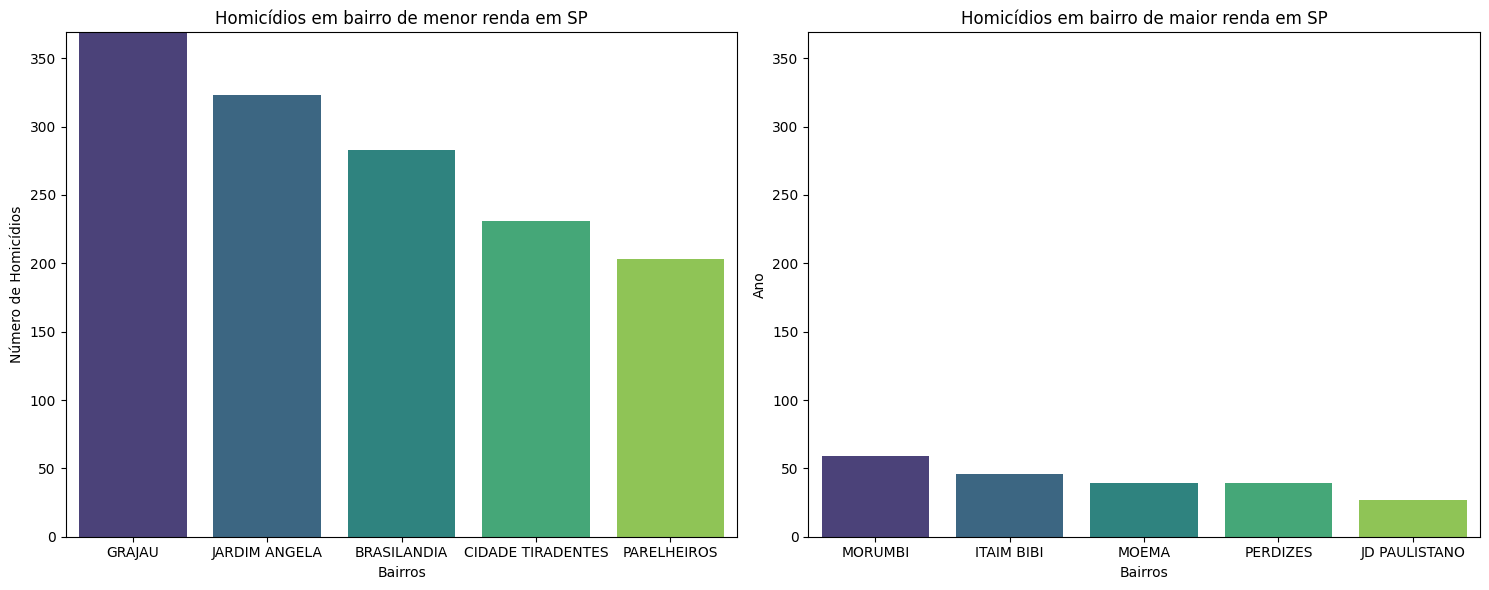

In [87]:
# Criando os gráficos lado a lado
plt.figure(figsize=(15, 6))

# Encontrando a escala máxima para ambos os DataFrames
max_scale = max(homicidios_menor["NUM_BO"].max(), homicidios_maior["ANO"].max())

# Gráfico 1 - Lado esquerdo
plt.subplot(1, 2, 1)
sns.barplot(x=homicidios_menor["BAIRRO"], y=homicidios_menor["NUM_BO"], data=homicidios_menor, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Número de Homicídios")
plt.title("Homicídios em bairro de menor renda em SP")
plt.ylim(0, max_scale)  # Definindo limite superior do eixo y igual para ambos os gráficos
plt.tight_layout()

# Gráfico 2 - Lado direito
plt.subplot(1, 2, 2)
sns.barplot(x=homicidios_maior["BAIRRO"], y=homicidios_maior["ANO"], data=homicidios_maior, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Ano")  
plt.title("Homicídios em bairro de maior renda em SP")
plt.ylim(0, max_scale)  # Definindo limite superior do eixo y igual para ambos os gráficos
plt.tight_layout()

plt.show()

In [118]:
# Combinando os bairros de menor renda e de maior renda em um dataframe, utilizando todos os dados dos dois dataframes diferentes
bairros_renda = homicidios_menor.merge(homicidios_maior, how='outer')

# Fazendo um gráfico de dispersão
fig = px.scatter(bairros_renda, x=bairros_renda["ANO"], y=bairros_renda["BAIRRO"], title='Gráfico de Dispersão dos Bairros de menor e maior renda')

# Personalizando o layout do gráfico
fig.update_layout(
    xaxis_title='Número Homicídios',
    yaxis_title='Bairros',
)

# Exibindo o gráfico interativo
fig.show()

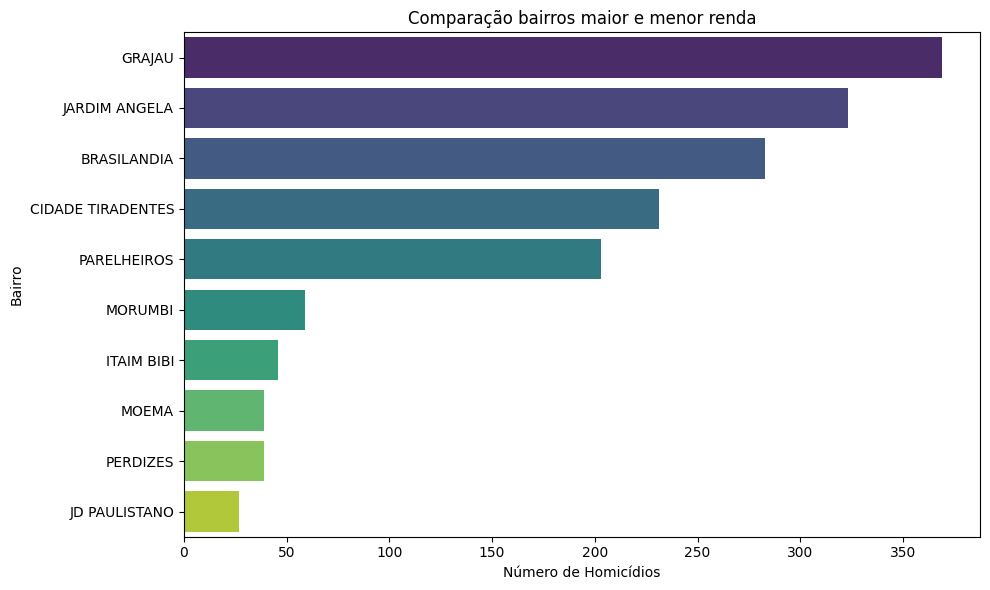

In [89]:
plot_zona(bairros_renda, "Comparação bairros maior e menor renda")

In [90]:
# Somando a quantidade de homicídios ocorridos por bairro
bairro_homicidios = bairros_renda.groupby('BAIRRO')['ANO'].sum()

# Somando o total de homicídios
total_homicidios = bairro_homicidios.sum()
# Trazendo a porcentagem de homicídios de cada bairro 
bairro_percentages = (bairro_homicidios / total_homicidios) * 100

# Fazendo um gráfico de pizza para visualizar o tamanho que cada bairro tem na taxa de homicídios, comparando os de maior e menor renda apenas
fig = go.Figure(data=[go.Pie(labels=bairro_percentages.index, values=bairro_percentages.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=15)
fig.update_layout(title='Porcentagem de Homicídios por Bairro', 
                  title_font_size=24,  showlegend=False, height=600, width=800)
fig.show()

# Segunda hipótese:

    Homicídios ocorrem com maior frequência a noite e em locais abertos.

In [91]:
# Agrupando Dataframe por local e mostrando a quantidade de homicícios em ordem decrescente por local, apenas o top 10
local = homicidio_consumado.groupby("LOCAL").count().sort_values(by="ANO", ascending=False).iloc[0:11]

# Agrupando Dataframe por periodo e mostrando a quantidade de homicícios em ordem decrescente por por periodo
periodo = homicidio_consumado.groupby("PERIODO").count().sort_values(by="ANO", ascending=False)

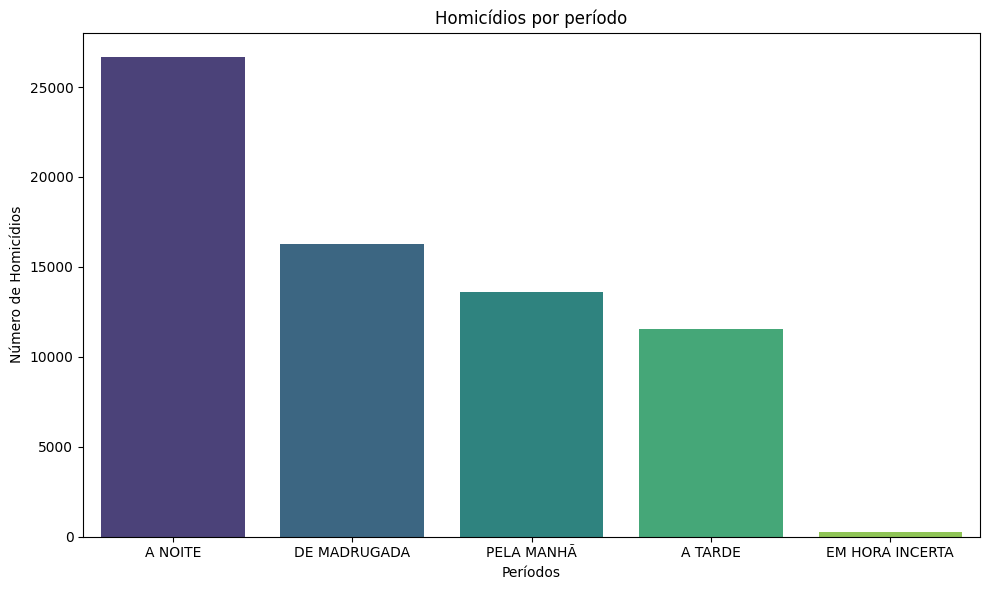

In [92]:
# Gráfico de barras para os períodos
plt.figure(figsize=(10, 6))
sns.barplot(x=periodo.index, y=periodo["BAIRRO"], data=periodo, palette="viridis")
plt.xlabel("Períodos")
plt.ylabel("Número de Homicídios")
plt.title("Homicídios por período")
plt.tight_layout()
plt.show()

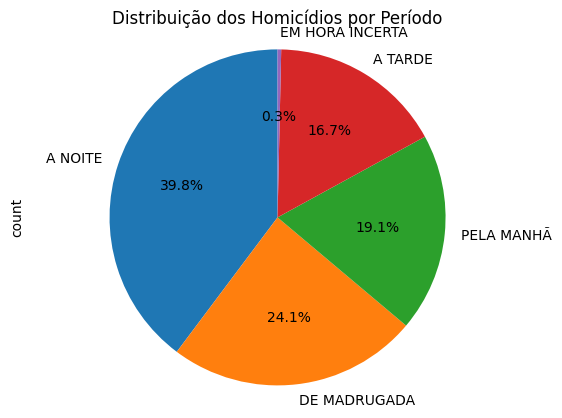

In [93]:
# Gráfico de pizza para os períodos
contagem_periodos = homicidio["PERIODO"].value_counts()

contagem_periodos.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribuição dos Homicídios por Período")
plt.axis('equal')  # Aspecto de círculo

plt.show()

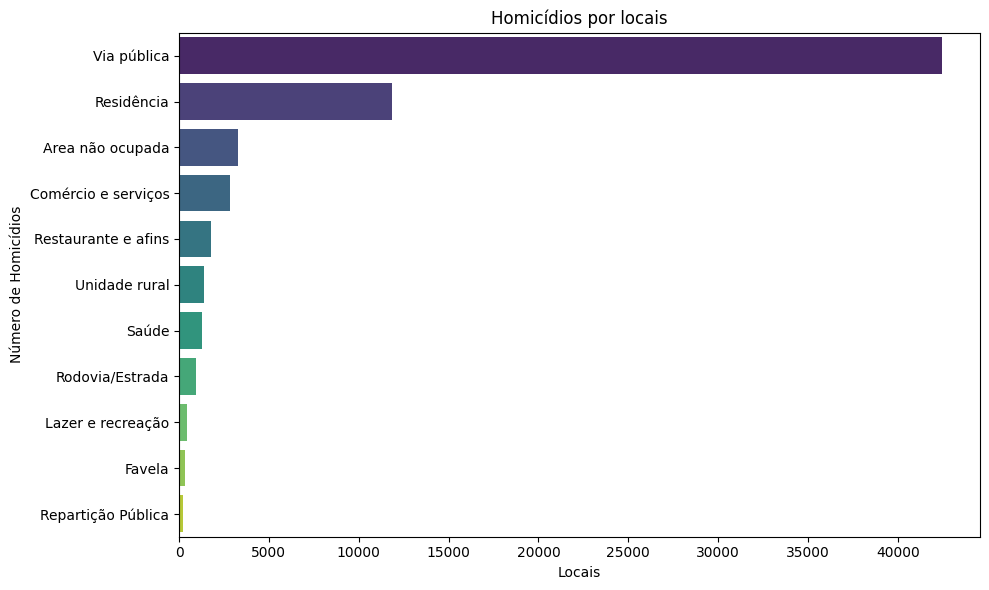

In [94]:
# Gráfico de barras para os locais
plt.figure(figsize=(10, 6))
sns.barplot(x=local["BAIRRO"], y=local.index, data=local, palette="viridis")
plt.xlabel("Locais")
plt.ylabel("Número de Homicídios")
plt.title("Homicídios por locais")
plt.tight_layout()
plt.show()

In [130]:
# Selecionando apenas as vias públicas e as residências
homicidio_locais = homicidio_consumado[(homicidio_consumado["LOCAL"] == "Via pública") | (homicidio_consumado['LOCAL'] == "Residência")]

# Agrupando por local e depois por período e somando as quantidades de homicídios em ordem decrescente para cada local/período
homicidio_locais = homicidio_locais.groupby([ "LOCAL", "PERIODO"]).count().sort_values(by=["ANO", "ANO"], ascending=[False, True]).reset_index()

# Gráfico de linha para comparar quais locais/períodos que tem mais homicídios
fig = go.Figure()

for local in homicidio_locais['LOCAL'].unique():

    df_local = homicidio_locais[homicidio_locais['LOCAL'] == local]

    fig.add_trace(go.Scatter(x=df_local['PERIODO'], y=df_local['NUM_BO'], mode='lines+markers', name=local))


fig.update_layout(title='Quantidade de Homicídios por Período e Local',
                  xaxis_title='Período', yaxis_title='Número de Homicídios',
                  title_font_size=24, xaxis_tickangle=-45)

fig.show()

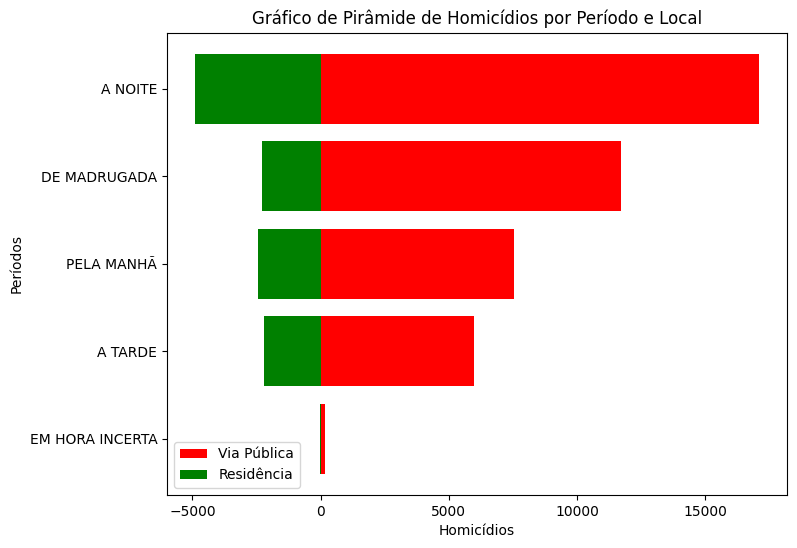

In [128]:
# Separando em dois DataFrames diferentes os homicídios em via pública e residência
df_hom_via = homicidio_consumado[homicidio_consumado["LOCAL"] == "Via pública"]
df_hom_res = homicidio_consumado[homicidio_consumado['LOCAL'] == "Residência"]

# Agrupando por local e depois por período e somando as quantidades de homicídios em ordem decrescente para cada local/período
df_hom_via = df_hom_via.groupby([ "LOCAL", "PERIODO"]).count().sort_values(by=["ANO", "ANO"], ascending=[False, True]).reset_index()

# Agrupando por local e depois por período e somando as quantidades de homicídios em ordem decrescente para cada local/período
df_hom_res = df_hom_res.groupby([ "LOCAL", "PERIODO"]).count().sort_values(by=["ANO", "ANO"], ascending=[False, True]).reset_index()

# Criando o gráfico de pirâmide
plt.figure(figsize=(8, 6))

# Gráfico de barras para a Via Pública
plt.barh(df_hom_via["PERIODO"], df_hom_via["NUM_BO"], color="red", label="Via Pública")

# Gráfico de barras para a Residência
plt.barh(df_hom_res["PERIODO"], -df_hom_res["NUM_BO"], color="green", label="Residência")

# Configurações do gráfico
plt.xlabel("Homicídios")
plt.ylabel("Períodos")
plt.title("Gráfico de Pirâmide de Homicídios por Período e Local")
plt.legend()

# Inverte o eixo y para que os períodos fiquem na ordem correta
plt.gca().invert_yaxis()

plt.show()

In [96]:
# TOP 10 BAIRROS COM MAIOR TAXA DE HOMICIDIO
top_bairros = ["GRAJAU",
"CAMPO LIMPO",
"ITAIM PAULISTA",
"ITAQUERA",
"JARDIM ANGELA",
"JD SÃO LUIS",
"BRASILANDIA",
"CAPAO REDONDO",
"CIDADE TIRADENTES",
"PIRITUBA"]

# Selecionando apenas os top 10 bairros e agrupando por bairro, além de contar a quantidade de homicídios em ordem decrescente
top_bairros_hom = cidade_sp[cidade_sp["BAIRRO"].isin(top_bairros)].groupby("BAIRRO").count().sort_values(by="NUM_BO", ascending=False).reset_index()

# Criando uma coluna 'Categoria' para categorizar o que não ta no top 10 como outros
cidade_sp['Categoria'] = cidade_sp['BAIRRO'].apply(lambda x: x if x in top_bairros else 'Outros')

# Contando a quantidade de bairros em cada categoria
category_counts = cidade_sp['Categoria'].value_counts()

total_bairros = len(cidade_sp)
categoria_porcentagem = (category_counts / total_bairros) * 100

# Criando o gráfico de pizza com Plotly
fig = go.Figure(data=[go.Pie(labels=categoria_porcentagem.index, values=categoria_porcentagem.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=15,
                  marker=dict(colors=px.colors.qualitative.Pastel[0:len(top_bairros)]))
fig.update_layout(title="Top 10 Bairros", 
                  title_font_size=20, showlegend=False, height=1000, width=800)
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16788\930527770.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Hipóteses Secundárias:

    Homicídios aumentaram ao longo do tempo em todas as zonas de São Paulo da mesma forma.

In [97]:
# Lista com bairros do centro
centro_bairros = ["Sé Bela Vista", "Bom Retiro", "Cambuci", "Consolação", "Liberdade", "República", "Santa Cecília", "Sé", "Centro"]

# Usando as funções
centro, centro_hom = maiuscula(centro_bairros)

In [98]:
# Lista com bairros do sul
sul_bairros = ["Campo Limpo", "Capão Redondo", "Vila Andrade", "Capela do Socorro Cidade Dutra", "Grajau", "Socorro", "Cidade Ademar", "Pedreira", "Ipiranga", "Sacomã", "Jabaquara", "M'Boi Mirim", "Jardim Ângela", "Jardim São Luís", "Parelheiros", "Marsilac", "Santo Amaro", "Campo Belo", "Campo Grande", "Santo Amaro", "Moema", "Saúde", "Vila Mariana"]

# Usando as funções
sul, sul_hom = maiuscula(sul_bairros)

In [99]:
# Lista com bairros do leste
leste_bairros = ["Aricanduva", "Carrão", "Vila Formosa", "Cidade Tiradentes", "Ermelino Matarazzo", "Ponte Rasa", "Guaianases", "Lajeado", "Itaim Paulista", "Vila Curuçá", "Itaquera", "Cidade Líder", "José Bonifácio", "Parque do Carmo", "Mooca Água Rasa", "Belém", "Brás", "Moóca", "Pari", "Tatuapé", "Penha", "Artur Alvim", "Cangaíba", "Penha", "Vila Matilde", "São Mateus", "São Rafael", "São Miguel", "Jardim Helena", "Vila Jacuí", "Sapopemba", "Vila Prudente", "São Lucas"]

leste, leste_hom = maiuscula(leste_bairros)

In [100]:
# Lista com bairros do norte
norte_bairros = ["Casa Verde", "Cachoeirinha", "Limão", "Brasilândia", "Freguesia do Ó", "Jaçanã", "Tremembé", "Perus", "Anhanguera", "Pirituba", "Jaraguá", "São Domingos", "Santana", "Tucuruvi", "Mandaqui", "Vila Maria", "Vila Guilherme", "Vila Medeiros"]

norte, norte_hom = maiuscula(norte_bairros)

In [101]:
# Lista com bairros do oeste
oeste_bairros = ["Butantã", "Morumbi", "Raposo Tavares", "Rio Pequeno", "Vila Sônia", "Lapa", "Barra Funda", "Jaguara", "Jaguaré", "Perdizes", "Vila Leopoldina", "Pinheiros", "Alto de Pinheiros", "Itaim Bibi", "Jardim Paulista", "Pinheiros"]

oeste, oeste_hom = maiuscula(oeste_bairros)

,BAIRRO,ANO,NUM_BO,HORA,PERIODO,CIDADE,UF,LOCAL,STATUS,Categoria
0,RIO PEQUENO,112,112,112,112,112,112,112,112,112
1,LAPA,104,104,104,104,104,104,104,104,104
2,RAPOSO TAVARES,92,92,92,92,92,92,92,92,92
3,VILA LEOPOLDINA,72,72,72,72,72,72,72,72,72
4,PINHEIROS,71,71,71,71,71,71,71,71,71


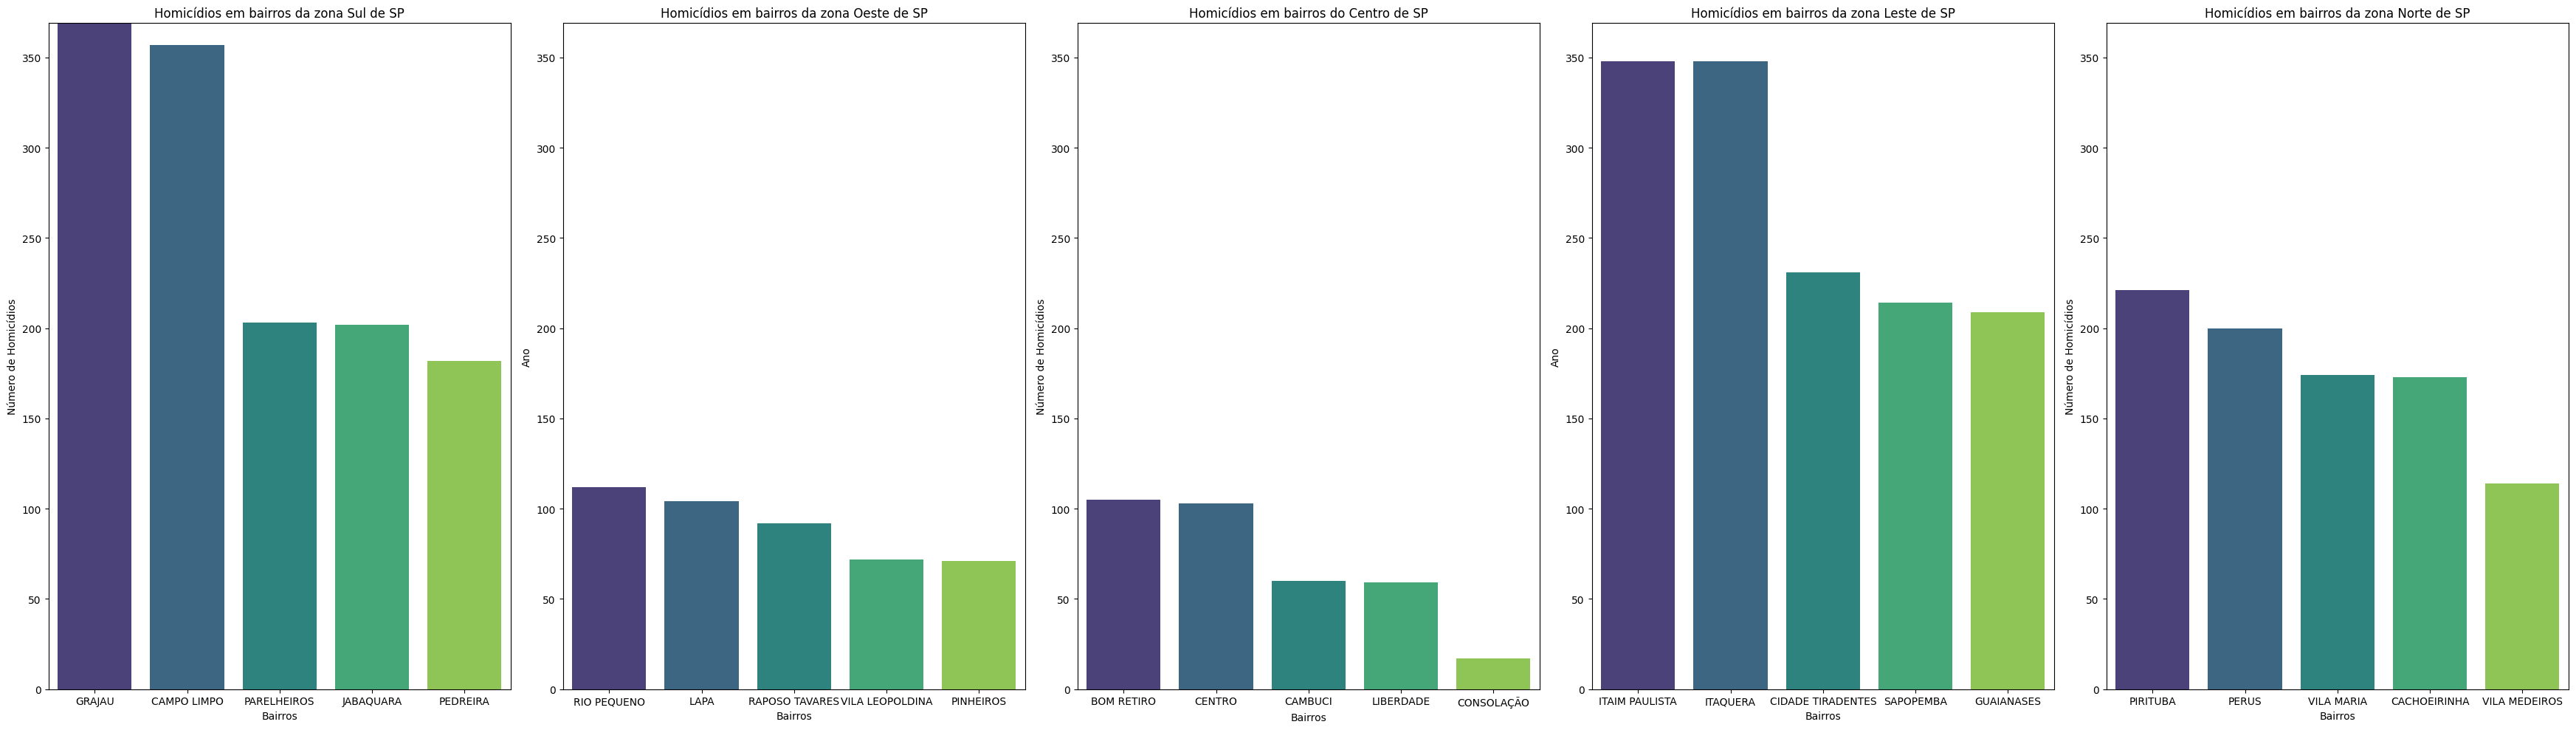

In [102]:
# Criando os gráficos lado a lado

plt.figure(figsize=(35, 10))

# Encontrando a escala máxima para todos os DataFrames
max_scale = max(oeste_hom["NUM_BO"].max(), 
                sul_hom["ANO"].max(),
                norte_hom["NUM_BO"].max(),
                leste_hom["ANO"].max(),
                centro_hom["NUM_BO"].max())

# Gráfico 1 - Lado esquerdo
plt.subplot(1, 5, 1)
sns.barplot(x=sul_hom["BAIRRO"], y=sul_hom["NUM_BO"], data=sul_hom, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Número de Homicídios")
plt.title("Homicídios em bairros da zona Sul de SP")
plt.ylim(0, max_scale)  # Definindo limite superior do eixo y igual para todos os gráficos
plt.tight_layout()

# Gráfico 2 - Lado central esquerdo
plt.subplot(1, 5, 2)
sns.barplot(x=oeste_hom["BAIRRO"], y=oeste_hom["ANO"], data=oeste_hom, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Ano")  
plt.title("Homicídios em bairros da zona Oeste de SP")
plt.ylim(0, max_scale)
plt.tight_layout()

# Gráfico 3 - Lado central
plt.subplot(1, 5, 3)
sns.barplot(x=centro_hom["BAIRRO"], y=centro_hom["NUM_BO"], data=centro_hom, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Número de Homicídios")
plt.title("Homicídios em bairros do Centro de SP")
plt.ylim(0, max_scale)
plt.tight_layout()

# Gráfico 4 - Lado central direito
plt.subplot(1, 5, 4)
sns.barplot(x=leste_hom["BAIRRO"], y=leste_hom["ANO"], data=leste_hom, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Ano")  
plt.title("Homicídios em bairros da zona Leste de SP")
plt.ylim(0, max_scale)
plt.tight_layout()

# Gráfico 5 - Lado direito
plt.subplot(1, 5, 5)
sns.barplot(x=norte_hom["BAIRRO"], y=norte_hom["NUM_BO"], data=norte_hom, palette="viridis")
plt.xlabel("Bairros")
plt.ylabel("Número de Homicídios")
plt.title("Homicídios em bairros da zona Norte de SP")
plt.ylim(0, max_scale)
plt.tight_layout()

plt.show()

In [132]:
# Adicionando a coluna "ZONA" em cada DataFrame
sul['ZONA'] = "Zona Sul"
oeste['ZONA'] = "Zona Oeste"
centro['ZONA'] = "Centro"
leste['ZONA'] = "Zona Leste"
norte['ZONA'] = "Zona Norte"

# Concatenando os DataFrames em um único DataFrame
df_zonas = pd.concat([sul, oeste, centro, leste, norte], ignore_index=True)

# Convertendo as colunas "ANO" e "NUM_BO" para formato numérico
df_zonas['ANO'] = pd.to_numeric(df_zonas['ANO'])
df_zonas['NUM_BO'] = pd.to_numeric(df_zonas['NUM_BO'])

# Agrupando os dados por zona e bairro, somando o número de homicídios
df_grouped = df_zonas.groupby(['ANO', 'ZONA']).sum().reset_index()

# Plotando o gráfico de linha
fig = px.line(df_grouped, x='ANO', y='NUM_BO', color='ZONA', line_group='ZONA', title='Progressão dos Homicídios por Zona em SP')
fig.update_layout(xaxis_title='Ano', yaxis_title='Número de Homicídios', legend_title='Zona')
fig.show()

# Hipóteses secundárias:

    Homens entre 21 e 30 anos tem uma maior taxa de homicídios.

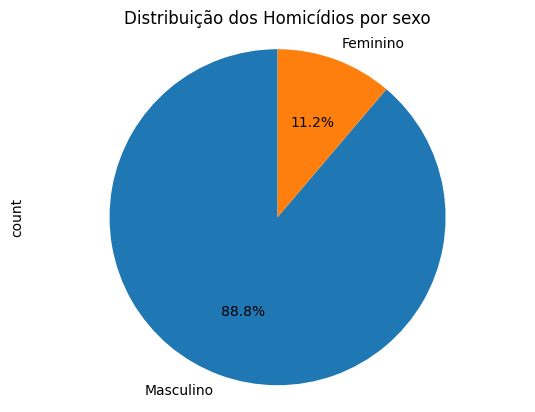

In [104]:
# Contando os homicídios por sexo
contagem_sexo = sexo["SEXO"].value_counts()

# Gráfico de pizza
contagem_sexo.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribuição dos Homicídios por sexo")
plt.axis('equal') 

plt.show()

In [105]:
# Juntando os dataframes de idade e sexo e agrupando por sexo de depois idade para mostrar a quantidade em ordem decrescente de homicídios
correlacao_idade_sexo = idade.merge(sexo, how='inner').groupby(["SEXO","IDADE"]).count().sort_values(by=["NUM_BO","NUM_BO"], ascending=[False, True]).reset_index()
# Juntando os dataframes de idade e sexo e removendo outliers
correlacao = idade.merge(sexo, how='inner').set_index('IDADE').drop('150,0').reset_index()

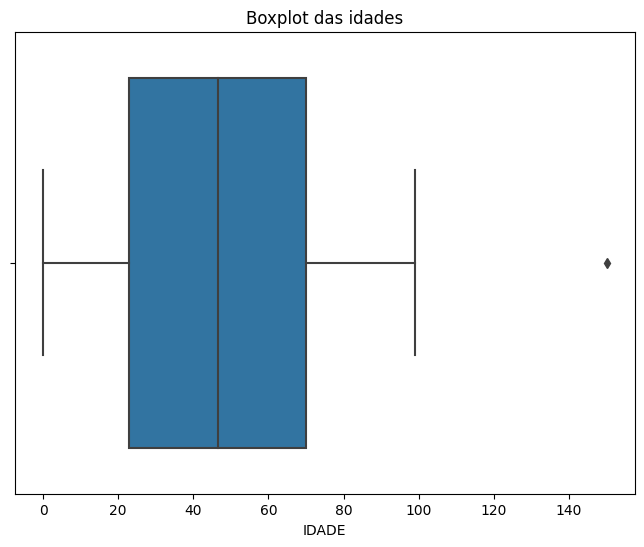

In [106]:
# Tornando a coluna 'IDADE' em integer
correlacao_idade_sexo['IDADE'] = correlacao_idade_sexo['IDADE'].str.replace(',', '.').astype(float).astype(int)

# Plotando um boxplot para verificar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=correlacao_idade_sexo['IDADE'])
plt.title('Boxplot das idades')
plt.xlabel('IDADE')
plt.show()

In [107]:
# Verificando outliers
Q1 = correlacao_idade_sexo['IDADE'].quantile(0.25)
Q3 = correlacao_idade_sexo['IDADE'].quantile(0.75)

limite_superior = limite_superior = Q3 + 1.5 * (Q3 - Q1)

correlacao_outliers = correlacao_idade_sexo[correlacao_idade_sexo["IDADE"] > limite_superior]
correlacao_outliers

,SEXO,IDADE,ANO_BO,NUM_BO,BAIRRO
187,Masculino,150,1,1,1


In [108]:
# Tornando a coluna 'IDADE' em integer  
correlacao['IDADE'] = correlacao['IDADE'].str.replace(',', '.').astype(float).astype(int)

In [109]:
# Definindo as faixas etárias
faixas_etarias = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Criando coluna 'Faixa Etária'
correlacao['Faixa Etária'] = pd.cut(correlacao['IDADE'], bins=faixas_etarias, labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])

# Agrupando os dados por sexo e faixa etária e mostrando as quantidades de homicídios para cada faixa etária
correlacao_agrupado = correlacao.groupby(['SEXO', 'Faixa Etária'])['ANO_BO'].count().reset_index()

# Renomeando coluna
correlacao_agrupado = correlacao_agrupado.rename(columns={"ANO_BO": "Homicídios"})
correlacao_agrupado

,SEXO,Faixa Etária,Homicídios
0,Feminino,0-10,97
1,Feminino,11-20,427
2,Feminino,21-30,921
3,Feminino,31-40,897
4,Feminino,41-50,616
5,Feminino,51-60,320
6,Feminino,61-70,155
7,Feminino,71-80,78
8,Feminino,81-90,29
9,Feminino,91-100,7


In [110]:
# Criando o gráfico de barras com Plotly
fig = go.Figure()

# Iterando pelos sexos únicos no DataFrame
for sexo in correlacao_agrupado['SEXO'].unique():
    # Selecionando apenas os dados para o sexo atual
    df_sexo = correlacao_agrupado[correlacao_agrupado['SEXO'] == sexo]
    # Adicionando a barra no gráfico
    fig.add_trace(go.Bar(x=df_sexo['Faixa Etária'], y=df_sexo['Homicídios'], name=sexo))

# Personalizando o layout do gráfico
fig.update_layout(title='Número de homicídios por Faixa Etária e Sexo',
                  xaxis_title='Faixa Etária', yaxis_title='Número de Homicídios',
                  title_font_size=12, xaxis_tickangle=-45, barmode='group')

fig.show()

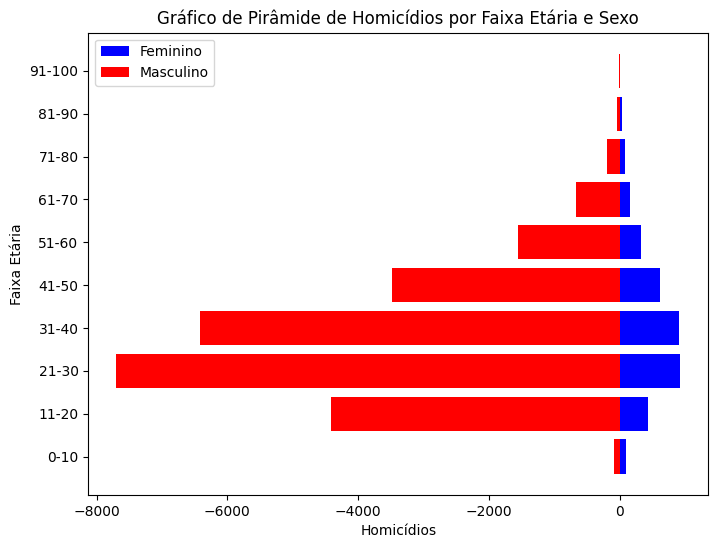

In [129]:
# Separando os dados por sexo
df_feminino = correlacao_agrupado[correlacao_agrupado["SEXO"] == "Feminino"]
df_masculino = correlacao_agrupado[correlacao_agrupado["SEXO"] == "Masculino"]

# Criando o gráfico de pirâmide
plt.figure(figsize=(8, 6))

# Gráfico de barras para o sexo feminino
plt.barh(df_feminino["Faixa Etária"], df_feminino["Homicídios"], color="blue", label="Feminino")

# Gráfico de barras para o sexo masculino (invertendo a ordem)
plt.barh(df_masculino["Faixa Etária"], -df_masculino["Homicídios"], color="red", label="Masculino")

# Configurações do gráfico
plt.xlabel("Homicídios")
plt.ylabel("Faixa Etária")
plt.title("Gráfico de Pirâmide de Homicídios por Faixa Etária e Sexo")
plt.legend()

plt.show()